In [23]:
# This is a Python 3 environment

# Base level imports for data science work
import numpy as np 
import pandas as pd
import re,string,unicodedata
import os
from os import path
from json import decoder
import glob, os, json
import re

# Visualization Libs
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# NLP Libs
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
from keras.preprocessing import text, sequence
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Additional Libs
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

# Deep Learning Libs
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

In [24]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
df_BA = pd.read_csv("https://chruezfalsch.ch/df_ba_cleaned_all_LEN.csv")
del df_BA['Unnamed: 0'] 

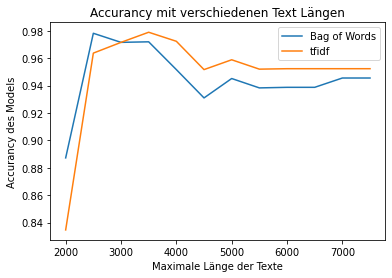

In [46]:
#max
def calclen(df1):
  df1 = df1[df1['text'].str.split().str.len().gt(400)]
  results_bag=pd.DataFrame()
  results_tfidf=pd.DataFrame()
  for i in range(2000,8000,500):
    shorted_df = df1[df1['text'].str.split().str.len().lt(i)]
    X = shorted_df.text
    y = shorted_df.fake
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8,stratify=y, random_state=19)
    cv=CountVectorizer(min_df=0.0,max_df=1.0,binary=False,ngram_range=(1,3))
    cv_train=cv.fit_transform(X_train)
    cv_test=cv.transform(X_test)
    tfidf=TfidfVectorizer(min_df=0.0,max_df=1.0,use_idf=True,ngram_range=(1,3))
    tfidf_train=tfidf.fit_transform(X_train)
    tfidf_test=tfidf.transform(X_test)
    mnb = MultinomialNB()
    mnb_cv = mnb.fit(cv_train, y_train)
    mnb_tfidf = mnb.fit(tfidf_train, y_train)
    mnb_cv_predict=mnb.predict(cv_test)
    mnb_tfidf_predict=mnb.predict(tfidf_test)
    mnb_cv_score=accuracy_score(y_test, mnb_cv_predict)
    mnb_tfidf_score=accuracy_score(y_test,mnb_tfidf_predict)
    mnb_cv_report = classification_report(y_test, mnb_cv_predict, target_names = ['0','1'])
    results_bag=results_bag.append({'len': i, 'accurancy': mnb_cv_score},ignore_index=True)
    mnb_tfidf_report = classification_report(y_test, mnb_tfidf_predict, target_names = ['0','1'])
    results_tfidf=results_tfidf.append({'len': i, 'accurancy': mnb_tfidf_score},ignore_index=True)

    #shorted_df = df2[df2['text'].str.split().str.len().lt(i)]
    #X_test = shorted_df.text
    #y_test = shorted_df.fake
    #X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8,stratify=y, random_state=19)
    #cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
    #cv_train=cv.fit_transform(X_train)
    #cv_test=cv.transform(X_test)
    #tfidf=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
    #tfidf_train=tfidf.fit_transform(X_train)
    #tfidf_test=tfidf.transform(X_test)
    #mnb = MultinomialNB()
    #mnb_cv = mnb.fit(cv_train, y_train)
    #mnb_tfidf = mnb.fit(tfidf_train, y_train)
    #mnb_cv_predict=mnb.predict(cv_test)
    #mnb_tfidf_predict=mnb.predict(tfidf_test)
    #mnb_cv_score=accuracy_score(y_test, mnb_cv_predict)
    #mnb_tfidf_score=accuracy_score(y_test,mnb_tfidf_predict)
    #mnb_cv_report = classification_report(y_test, mnb_cv_predict, target_names = ['0','1'])
    #results_bag=results_bag.append({'len': i, 'accurancy': mnb_cv_score},ignore_index=True)
    #mnb_tfidf_report = classification_report(y_test, mnb_tfidf_predict, target_names = ['0','1'])
    #results_tfidf=results_tfidf.append({'len': i, 'accurancy': mnb_tfidf_score},ignore_index=True)
  # importing the required modules
  import matplotlib.pyplot as plt
  import numpy as np
  
  y1 = results_bag['accurancy']
  x1 = results_bag['len']
  plt.plot(x1, y1, label = "Bag of Words")

  y2 = results_tfidf['accurancy']
  x2 = results_tfidf['len']
  plt.plot(x2, y2, label = "tfidf")

  plt.xlabel("Maximale Länge der Texte")
  plt.ylabel("Accurancy des Models")

  plt.title('Accurancy mit verschiedenen Text Längen')
  plt.legend()
  plt.show()
  
calclen(df_BA)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

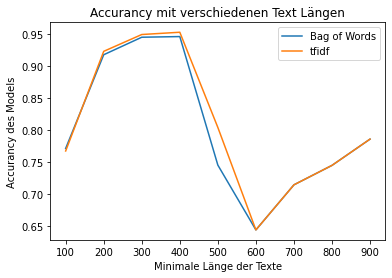

In [45]:
#min
def calclen(df1):
  df1 = df1[df1['text'].str.split().str.len().lt(10000)]
  results_bag=pd.DataFrame()
  results_tfidf=pd.DataFrame()
  for i in range(100,1000,100):
    shorted_df = df1[df1['text'].str.split().str.len().gt(i)]
    X = shorted_df.text
    y = shorted_df.fake
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8,stratify=y, random_state=19)
    cv=CountVectorizer(min_df=0.0,max_df=1.0,binary=False,ngram_range=(1,3))
    cv_train=cv.fit_transform(X_train)
    cv_test=cv.transform(X_test)
    tfidf=TfidfVectorizer(min_df=0.0,max_df=1.0,use_idf=True,ngram_range=(1,3))
    tfidf_train=tfidf.fit_transform(X_train)
    tfidf_test=tfidf.transform(X_test)
    mnb = MultinomialNB()
    mnb_cv = mnb.fit(cv_train, y_train)
    mnb_tfidf = mnb.fit(tfidf_train, y_train)
    mnb_cv_predict=mnb.predict(cv_test)
    mnb_tfidf_predict=mnb.predict(tfidf_test)
    mnb_cv_score=accuracy_score(y_test, mnb_cv_predict)
    mnb_tfidf_score=accuracy_score(y_test,mnb_tfidf_predict)
    mnb_cv_report = classification_report(y_test, mnb_cv_predict, target_names = ['0','1'])
    results_bag=results_bag.append({'len': i, 'accurancy': mnb_cv_score},ignore_index=True)
    mnb_tfidf_report = classification_report(y_test, mnb_tfidf_predict, target_names = ['0','1'])
    results_tfidf=results_tfidf.append({'len': i, 'accurancy': mnb_tfidf_score},ignore_index=True)
  # importing the required modules
  import matplotlib.pyplot as plt
  import numpy as np
  
  y1 = results_bag['accurancy']
  x1 = results_bag['len']
  plt.plot(x1, y1, label = "Bag of Words")

  y2 = results_tfidf['accurancy']
  x2 = results_tfidf['len']
  plt.plot(x2, y2, label = "tfidf")

  plt.xlabel("Minimale Länge der Texte")
  plt.ylabel("Accurancy des Models")

  plt.title('Accurancy mit verschiedenen Text Längen')
  plt.legend()
  plt.show()
  
calclen(df_BA)

In [28]:
df_val = df_BA[df_BA.fake == 0].sample(125)
df_val = df_val.append(df_BA[df_BA.fake == 1].sample(125))
df_BA = df_BA.drop(df_val.index)

In [41]:
def calclen(df1):
  results_bag_Training=pd.DataFrame()
  results_tfidf_Training=pd.DataFrame() 
  for i in range(2000,10000,500):
    shorted_df = df1[df1['text'].str.split().str.len().lt(i)]
    for o in range(100,800,100):
        shorted_df = shorted_df[shorted_df['text'].str.split().str.len().gt(o)]
        X = shorted_df.text
        y = shorted_df.fake
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8,stratify=y, random_state=19)
        cv=CountVectorizer(min_df=0.0,max_df=1.0,binary=False,ngram_range=(1,3))
        cv_train=cv.fit_transform(X_train)
        cv_test=cv.transform(X_test)
        tfidf=TfidfVectorizer(min_df=0.0,max_df=1.0,use_idf=True,ngram_range=(1,3))
        tfidf_train=tfidf.fit_transform(X_train)
        tfidf_test=tfidf.transform(X_test)
        mnb = MultinomialNB()
        mnb_cv = mnb.fit(cv_train, y_train)
        mnb_tfidf = mnb.fit(tfidf_train, y_train)
        mnb_cv_predict=mnb.predict(cv_test)
        mnb_tfidf_predict=mnb.predict(tfidf_test)
        mnb_cv_score=accuracy_score(y_test, mnb_cv_predict)
        mnb_tfidf_score=accuracy_score(y_test,mnb_tfidf_predict)
        mnb_cv_report = classification_report(y_test, mnb_cv_predict, target_names = ['0','1'])
        results_bag_Training=results_bag_Training.append({'minim': o, 'maxi':i,'accurancy': mnb_cv_score},ignore_index=True)
        mnb_tfidf_report = classification_report(y_test, mnb_tfidf_predict, target_names = ['0','1'])
        results_tfidf_Training=results_tfidf_Training.append({'minim': o, 'maxi':i,'accurancy': mnb_tfidf_score},ignore_index=True)
  results_bag_Training.to_csv('results_bag_Training.csv')
  !cp results_bag_Training.csv "/content/drive/MyDrive/BA/Project/results_bag_Training.csv"
  results_tfidf_Training.to_csv('results_tfidf_Training.csv')
  !cp results_tfidf_Training.csv "/content/drive/MyDrive/BA/Project/results_tfidf_Training.csv"
  return results_tfidf_Training
results=calclen(df_BA)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [42]:
results['accurancy'].idxmax()

24

In [43]:
results.iloc[results['accurancy'].idxmax()]

minim         400.000000
maxi         3500.000000
accurancy       0.979021
Name: 24, dtype: float64

In [44]:
def validate(df1,df2,mini,maxi):
  shorted_df = df1[df1['text'].str.split().str.len().lt(maxi)]
  shorted_df = shorted_df[shorted_df['text'].str.split().str.len().gt(mini)]
  X = df1.text
  y = df1.fake
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8,stratify=y, random_state=19)
  cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
  cv_train=cv.fit_transform(X_train)
  cv_test=cv.transform(X_test)
  tfidf=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
  tfidf_train=tfidf.fit_transform(X_train)
  tfidf_test=tfidf.transform(X_test)
  mnb = MultinomialNB()
  mnb_cv = mnb.fit(cv_train, y_train)
  mnb_tfidf = mnb.fit(tfidf_train, y_train)
  mnb_cv_predict=mnb.predict(cv_test)
  mnb_tfidf_predict=mnb.predict(tfidf_test)
  mnb_cv_score=accuracy_score(y_test, mnb_cv_predict)
  mnb_tfidf_score=accuracy_score(y_test,mnb_tfidf_predict)
  mnb_cv_report = classification_report(y_test, mnb_cv_predict, target_names = ['0','1'])
  #results_bag=results_bag.append({'len': q, 'accurancy': mnb_cv_score},ignore_index=True)
  mnb_tfidf_report = classification_report(y_test, mnb_tfidf_predict, target_names = ['0','1'])
  #results_tfidf=results_tfidf.append({'len': q, 'accurancy': mnb_tfidf_score},ignore_index=True)
  print("Testset")
  print(mnb_cv_report)
  print(mnb_tfidf_report)
  del shorted_df
  shorted_df = df2[df2['text'].str.split().str.len().lt(maxi)]
  shorted_df = shorted_df[shorted_df['text'].str.split().str.len().gt(mini)]

  del X_train, X_test, y_train, y_test, cv_test, tfidf_test
  X_test = shorted_df.text
  y_test = shorted_df.fake

  # Transform the test dataset
  cv_test=cv.transform(X_test)
  print('Bag of words Test:',cv_test.shape)

  # Transform the test dataset
  tfidf_test=tfidf.transform(X_test)
  print('TF-IDF Test:',tfidf_test.shape)

  # Predicting the model for bag of words
  mnb_cv_predict=mnb.predict(cv_test)

  # Predicting the model for tf-idf features
  mnb_tfidf_predict=mnb.predict(tfidf_test)

  # Check the accuracy score for bag of words
  mnb_cv_score=accuracy_score(y_test, mnb_cv_predict)
  print("Naive Bayes Bag of words accuracy score:", mnb_cv_score)

  # Check the accuracy score for tfidf features
  mnb_tfidf_score=accuracy_score(y_test,mnb_tfidf_predict)
  print("Naive Bayes TF-IDF accuracy score:", mnb_tfidf_score)

  mnb_cv_report_val = classification_report(y_test, mnb_cv_predict, target_names = ['0','1'])
  print(mnb_cv_report_val)
  mnb_tfidf_report_val = classification_report(y_test, mnb_tfidf_predict, target_names = ['0','1'])
  print(mnb_cv_report_val)
  
validate(df_BA,df_val,results.iloc[results['accurancy'].idxmax()].minim,results.iloc[results['accurancy'].idxmax()].maxi)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Testset
              precision    recall  f1-score   support

           0       0.96      0.37      0.54       180
           1       0.87      1.00      0.93       740

    accuracy                           0.87       920
   macro avg       0.91      0.68      0.73       920
weighted avg       0.88      0.87      0.85       920

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       180
           1       0.80      1.00      0.89       740

    accuracy                           0.80       920
   macro avg       0.40      0.50      0.45       920
weighted avg       0.65      0.80      0.72       920

Bag of words Test: (53, 1812921)
TF-IDF Test: (53, 1812921)
Naive Bayes Bag of words accuracy score: 0.7735849056603774
Naive Bayes TF-IDF accuracy score: 0.1509433962264151
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        45
           1       0.40      1.00      0.57         8



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
